In [1]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/alzatem204/Tennis-Predictions/main/mixed_training_data.csv"
response = requests.get(url)

with open("mixed_training_data_50P.csv", "wb") as f:
    f.write(response.content)

training_df = pd.read_csv("mixed_training_data_50P.csv")
display(training_df.head())

,p1_rank,p2_rank,p1_winrate,p2_winrate,surface,target
0,45.0,81.0,0.666667,0.666667,3,1
1,81.0,45.0,0.666667,0.666667,3,0
2,45.0,71.0,0.666667,0.666667,3,1
3,71.0,45.0,0.666667,0.666667,3,0
4,1.0,116.0,0.666667,0.800000,3,1


In [2]:
from sklearn.preprocessing import StandardScaler

# Separar features y etiquetas
X = training_df.drop("target", axis=1).values
y = training_df["target"].values

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluación
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {acc * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6279 - loss: 0.6421 - val_accuracy: 0.6399 - val_loss: 0.6280
Epoch 2/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6445 - loss: 0.6260 - val_accuracy: 0.6374 - val_loss: 0.6283
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6429 - loss: 0.6279 - val_accuracy: 0.6405 - val_loss: 0.6281
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6401 - loss: 0.6260 - val_accuracy: 0.6392 - val_loss: 0.6268
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6410 - loss: 0.6256 - val_accuracy: 0.6417 - val_loss: 0.6270
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6387 - loss: 0.6260 - val_accuracy: 0.6384 - val_loss: 0.6263
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6448 - loss: 0.6232 - val_accuracy: 0.6379 - val_loss: 0.6266
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6440 - loss: 0.6225 - val_accuracy: 0.6410 - val_

In [4]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.models import Model

X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Dividir para ambos modelos
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size=0.2, random_state=42, stratify=y)


cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.25),
    Conv1D(64, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento CNN (pocas épocas para ejemplo)
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=64, validation_data=(X_test_cnn, y_test_cnn), verbose=0)

# Evaluación CNN
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Print evaluation statistics
print(f"CNN Test Loss: {cnn_eval[0]:.4f}")
print(f"CNN Test Accuracy: {cnn_eval[1]:.4f}")

CNN Test Loss: 0.6248
CNN Test Accuracy: 0.6449


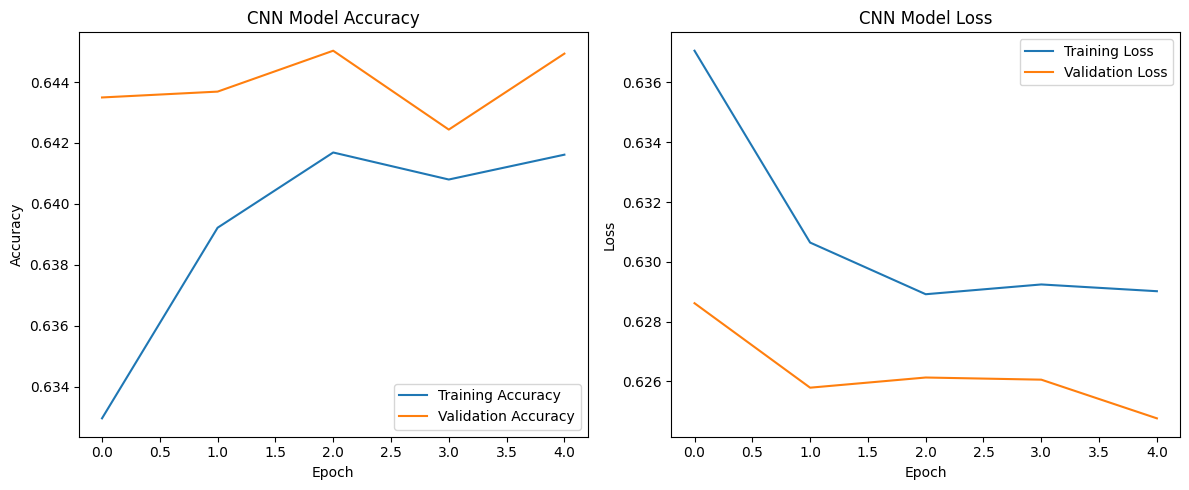

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


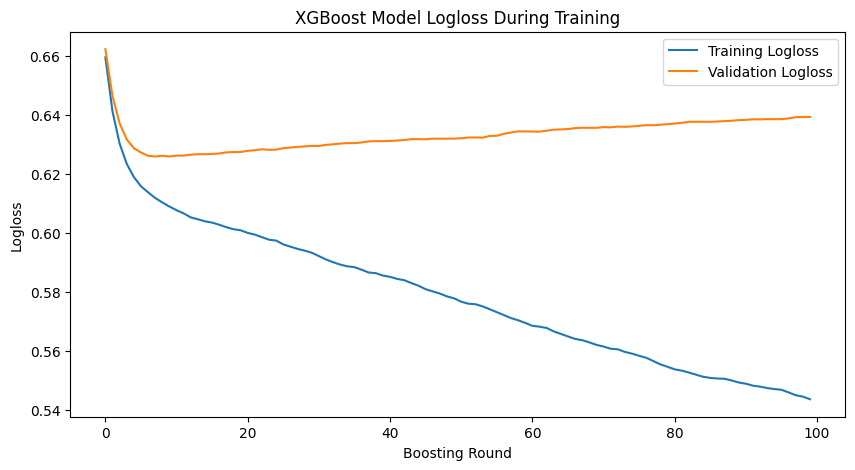

{'CNN_Accuracy': 64.49, 'XGBoost_Accuracy': 62.56}

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create evaluation set
eval_set = [(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)]

# Train the model with evaluation set
xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=eval_set, verbose=False)

# Evaluation XGBoost
xgb_accuracy = xgb_model.score(X_test_xgb, y_test_xgb)

# Get evaluation results
eval_results = xgb_model.evals_result()

# Plot evaluation metric
plt.figure(figsize=(10, 5))
plt.plot(eval_results['validation_0']['logloss'], label='Training Logloss')
plt.plot(eval_results['validation_1']['logloss'], label='Validation Logloss')
plt.title('XGBoost Model Logloss During Training')
plt.xlabel('Boosting Round')
plt.ylabel('Logloss')
plt.legend()
plt.show()

# Results
{
    "CNN_Accuracy": round(cnn_eval[1] * 100, 2),
    "XGBoost_Accuracy": round(xgb_accuracy * 100, 2)
}

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Modelo MLP profundo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluación
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {acc * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6251 - loss: 0.6471 - val_accuracy: 0.6444 - val_loss: 0.6261
Epoch 2/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6397 - loss: 0.6319 - val_accuracy: 0.6442 - val_loss: 0.6259
Epoch 3/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6374 - loss: 0.6306 - val_accuracy: 0.6454 - val_loss: 0.6258
Epoch 4/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6468 - loss: 0.6268 - val_accuracy: 0.6438 - val_loss: 0.6248
Epoch 5/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6398 - loss: 0.6307 - val_accuracy: 0.6431 - val_loss: 0.6249
Epoch 6/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6413 - loss: 0.6281 - val_accuracy: 0.6429 - val_loss: 0.6273
Epoch 7/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6391 - loss: 0.6293 - val_accuracy: 0.6466 - val_loss: 0.6249
Epoch 8/10
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6380 - loss: 0.6292 - val_accuracy: 0.6433 - val_

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Red neuronal más profunda y compleja
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(
    X_train, y_train,
    epochs=15,  # puedes aumentar más si ves que sigue mejorando
    batch_size=64,
    validation_data=(X_test, y_test)
)

# Evaluación
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {acc * 100:.2f}%")


Epoch 1/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6243 - loss: 0.6460 - val_accuracy: 0.6433 - val_loss: 0.6266
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6429 - loss: 0.6318 - val_accuracy: 0.6395 - val_loss: 0.6282
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6377 - loss: 0.6294 - val_accuracy: 0.6456 - val_loss: 0.6294
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6452 - loss: 0.6272 - val_accuracy: 0.6443 - val_loss: 0.6302
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6389 - loss: 0.6314 - val_accuracy: 0.6412 - val_loss: 0.6265
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6385 - loss: 0.6288 - val_accuracy: 0.6425 - val_loss: 0.6299
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6427 - loss: 0.6274 - val_accuracy: 0.6430 - val_loss: 0.6257
Epoch 8/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6449 - loss: 0.6262 - val_accuracy: 0.

In [11]:
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score

# Predicciones probabilísticas
y_pred_proba = model.predict(X_test).flatten()

# Métricas
print("Log Loss:", log_loss(y_test, y_pred_proba))
print("Brier Score:", brier_score_loss(y_test, y_pred_proba))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Log Loss: 0.6251045828978116
Brier Score: 0.21801057196089643
AUC-ROC: 0.7050963719258682
